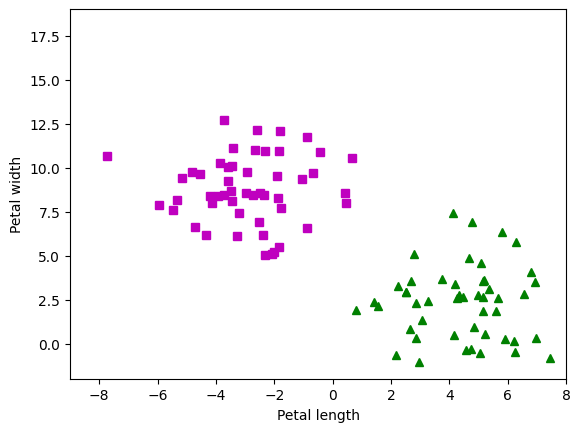

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=2.0)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([-9, 8, -2, 19])
plt.show()

[ 0.68059391 -0.25462612] 0.7273956659848366
[ 1.22329632 -0.46013838] 2.142480700136757
[ 0.49935747 -0.30072439] 1.176552007449037


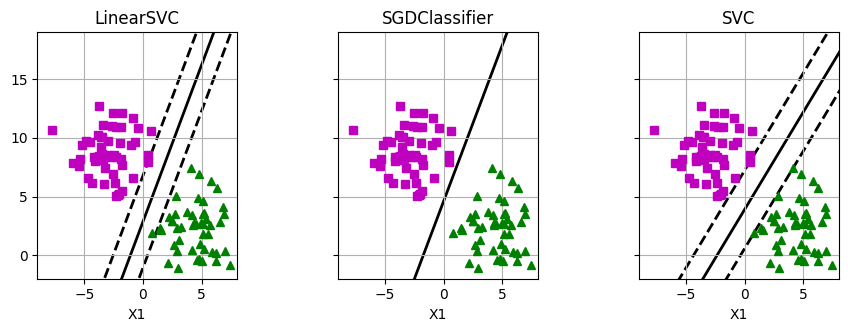

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

svm_clf = LinearSVC(
    loss="hinge", 
    C =1,
    random_state=42)
svm_clf.fit(X, y)

sgd_clf = SGDClassifier(
    loss="hinge", 
    alpha=0.019,
    max_iter=1000,
    random_state=42)
sgd_clf.fit(X, y)

svc_clf = SVC(
    kernel = "linear",
    random_state=42)
svc_clf.fit(X, y)


def plot_svc_decision_boundary(svm_clf, xmin, xmax, show_bounderies: bool = True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    print(w, b)

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    if show_bounderies:
        plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
        plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    # plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
    #             zorder=-1)

fig, axes = plt.subplots(ncols=3, 
                         figsize=(11, 3.2),
                         sharey=True)

plt.sca(axes[0])
plot_svc_decision_boundary(svm_clf, -9, 9)
plt.title("LinearSVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plt.xlabel("X1")
plt.axis([-9, 8, -2, 19])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(sgd_clf, -9, 9, False)
plt.title("SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plt.xlabel("X1")
plt.axis([-9, 8, -2, 19])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[2])
plot_svc_decision_boundary(svc_clf, -9, 9, True)
plt.title("SVC")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plt.xlabel("X1")
plt.axis([-9, 8, -2, 19])
plt.gca().set_aspect("equal")
plt.grid()


plt.show()

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
Xw = wine.data
yw = wine.target
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train),len(y_test)

(142, 36, 142, 36)

In [ ]:
from scipy.stats import uniform, expon,reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc_wine_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(
      # kernel = "rbf",
      random_state=42)
    )

distributions = {
    #kernel = ["linear", "poly", "rbf", "sigmoid"],
    #'linearsvc__gamma': reciprocal(0.00001, 100), 
    'linearsvc__C': reciprocal(0.00001, 100), 
}

clf = RandomizedSearchCV(svc_wine_clf, distributions, random_state=42)
search = clf.fit(X_train, y_train)
print(search.best_params_)
svc_wine_clf_best = search.best_estimator_

print(svc_wine_clf_best["linearsvc"].coef_[0], svc_wine_clf_best["linearsvc"].intercept_)
y_pred = svc_wine_clf_best.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))


print(precision_score(y_test, y_pred, average='weighted') ,recall_score(y_test, y_pred , average='weighted') )



{'linearsvc__C': 0.155099139875943}
[ 0.44513117  0.14494172  0.36041355 -0.57724018  0.01759044  0.02912666
  0.29059877 -0.03739904 -0.02450216  0.01770359 -0.02121878  0.38725487
  0.58388147] [-0.48316854 -0.45366777 -0.62776183]
1.0
1.0 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
Xc = housing.data
yc = housing.target

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.9, random_state=42)
len(Xc_train), len(Xc_test), len(yc_train), len(yc_test)

(2064, 18576, 2064, 18576)

In [ ]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

svm_reg = make_pipeline(StandardScaler(),
                        SVR(kernel="rbf", epsilon=0.5))

distributions = {
    "svr__kernel": ["linear", "poly", "rbf", "sigmoid"],
    'svr__gamma': reciprocal(0.00001, 100), 
    'svr__C': reciprocal(0.00001, 100), 
}

gs_reg = RandomizedSearchCV(svm_reg, distributions, scoring="neg_root_mean_squared_error")
gs_reg.fit(Xc_train, yc_train)

best_est = gs_reg.best_estimator_

yc_pred = best_est.predict(Xc_test)
mean_squared_error(yc_test, yc_pred), rmse(yc_pred, yc_test)

(1.1384776918542325, 1.0669947009494622)

In [ ]:
from sklearn.model_selection import cross_val_score
-cross_val_score(best_est, Xc_train, yc_train, scoring="neg_root_mean_squared_error")

array([1.05507051, 1.07935714, 1.05578329, 1.14133673, 1.15000234])

In [12]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0
        print(f"wandb {w}, {b}")

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        print(f"t shape: {t.shape}")
        print(f"X: {X[33]}; t: {t[33]}; y: {y[33]}")
        X_t = X * t
        print(f"X_t: {X_t[33]}")
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            #numpy.ravel(a, order='C'): return a contiguous flattened array
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            print(f"{X_t.dot(w)[15: 20]} + {(t * b)[15: 20]} => {(X_t.dot(w) + t * b)[15: 20]}")
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            print(f"ep: {epoch}::::{support_vectors_idx.shape}; {X_t_sv.shape}; {t_sv.shape}")

            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()
            print(f"eta: {self.eta(epoch)}")
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        print(self.coef_[0])
        
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

C = 1
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=3,
                      random_state=42)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [-5, 5]]))

wandb [[ 0.49671415]
 [-0.1382643 ]], 0
t shape: (100, 1)
X: [0.42209991 8.56273353]; t: [-1.]; y: 0
X_t: [-0.42209991 -8.56273353]
[[1.34282779]
 [1.41055206]
 [0.83460222]
 [2.40576473]
 [1.85193054]] + [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-0.]] => [[1.34282779]
 [1.41055206]
 [0.83460222]
 [2.40576473]
 [1.85193054]]
ep: 0::::(100,); (10, 2); (10, 1)
eta: 0.01
[[1.91164246]
 [2.66608455]
 [1.44066385]
 [3.10274663]
 [1.81474542]] + [[ 0.06]
 [ 0.06]
 [ 0.06]
 [ 0.06]
 [-0.06]] => [[1.97164246]
 [2.72608455]
 [1.50066385]
 [3.16274663]
 [1.75474542]]
ep: 1::::(100,); (9, 2); (9, 1)
eta: 0.00999000999000999
[[ 1.3874976 ]
 [-0.45638652]
 [ 0.12789373]
 [ 3.42257463]
 [ 4.30328928]] + [[ 0.03002997]
 [ 0.03002997]
 [ 0.03002997]
 [ 0.03002997]
 [-0.03002997]] => [[ 1.41752757]
 [-0.42635655]
 [ 0.1579237 ]
 [ 3.4526046 ]
 [ 4.27325931]]
ep: 2::::(100,); (15, 2); (15, 1)
eta: 0.00998003992015968
[[1.13422655]
 [0.04690917]]


array([[ True],
       [False]])